In [1]:
import numpy as np 
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [48]:
def my_kmeans(X,K,Visualisation=False,Seuil=0.001,Max_iterations = 100000):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    
    # Initialisation des clusters
    # par tirage de K exemples, pour tomber dans les données     
 
    Index_init = np.random.choice(N, K,replace = False)
    C = np.zeros((p,K))
    for k in range(K):
        C[:,k] = X[Index_init[k],:].T 
        
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              C[:,k]=np.mean(X[y==k,:],axis=0)
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return y

In [86]:
from sklearn.cluster import KMeans
def Evidence_accumulation_clustering(X,N,d):
    k=int(np.sqrt(N))
    T=200
    seuil=0.5
    Co_Ass=np.zeros((N,N))
    #Calcule de la matrice de co-association
    for  t in range(T):  
        yy=my_kmeans(X,k)
        for i in range(N):
            for j in range(N):
                if yy[i]==yy[j]:
                   Co_Ass[i,j]= Co_Ass[i,j]+1/T
    y=FindCluster(Co_Ass,seuil)
    return y,Co_Ass

In [102]:
def FindCluster(Co_Ass,seuil):
    N=len(Co_Ass)
    y=np.ones(N)*-1
    n_cluster=0
    for i in range(N):
            for j in range(N):
                if  Co_Ass[i,j]>seuil:
                    if y[i]==-1 and y[j]==-1:
                        n_cluster+=1
                        y[i]=n_cluster
                        y[j]=n_cluster
                    if y[i]!=-1 and y[j]==-1:
                        y[j]=y[i]
                    if y[j]!=-1 and y[i]==-1:
                        y[i]=y[j]
                    else:
                        n_cluster=max(y)+1
                        np.where(y==y[i],n_cluster,y)
                        np.where(y==y[j],n_cluster,y)
    statistiques=np.unique(y,return_counts=True)
    stat=list(statistiques[0])
    yy=[(y[p] if y[p]==-1 else stat.index(y[p])+1) for p in range(N)]
    y=np.asarray(yy)
    return y

In [103]:
iris = datasets.load_iris()
X=iris.data
s,mat=Evidence_accumulation_clustering(X,X.shape[0],X.shape[1])

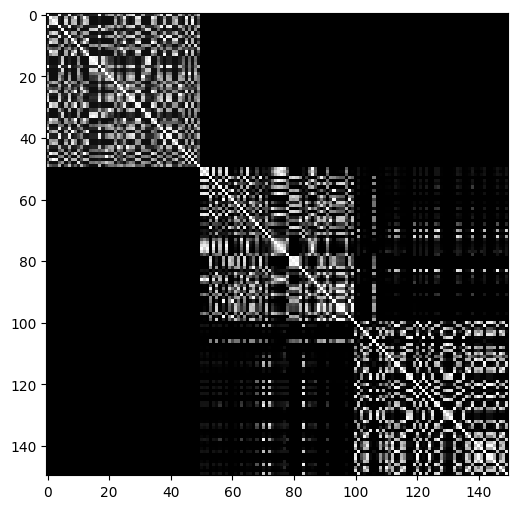

In [97]:
fig=plt.figure(3,figsize=(8,6))
plt.imshow(mat,cmap='gray')
plt.show()

In [104]:
s

array([ 1,  2,  2,  2,  1,  3,  2,  1,  2,  2,  3,  1,  2,  2,  3,  3,  3,
        1,  3,  3,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  3,  3,
        2,  2,  3,  1,  2,  1,  1,  2,  2,  1,  3,  2,  3,  2,  3,  1,  4,
        4,  4,  5,  4,  6,  4,  5,  4,  5,  5,  6,  5,  4,  5,  4,  6,  5,
        7,  5,  8,  6,  7,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  8,  6,
        4,  4,  4,  6,  5,  6,  4,  5,  5,  6,  6,  6,  4,  5,  6,  9,  8,
       10,  9,  9, 10,  5, 10,  9, 10,  9,  9,  9,  8,  8,  9,  9, 10, 10,
        8,  9,  8, 10,  8,  9, 10,  8,  8,  9, 10, 10, 10,  9,  8,  8, 10,
        9,  9,  8,  9,  9,  9,  8,  9,  9,  9,  8,  9,  9,  8])